In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_excel(r'C:\Users\Emincan\Desktop\ML-Projects\datasets-master-a6fa39d2490c3afd5b5eb24b6f250c13fe8b4f5a\User Knowledge Modeling\Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls' , sheet_name= 'Training_Data').drop(['Unnamed: 6' , 'Unnamed: 7' ,'Attribute Information:'] , axis = 1)
colInfo = pd.read_excel(r'C:\Users\Emincan\Desktop\ML-Projects\datasets-master-a6fa39d2490c3afd5b5eb24b6f250c13fe8b4f5a\User Knowledge Modeling\Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls' , sheet_name= 'Information')
test = pd.read_excel(r'C:\Users\Emincan\Desktop\ML-Projects\datasets-master-a6fa39d2490c3afd5b5eb24b6f250c13fe8b4f5a\User Knowledge Modeling\Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls' , sheet_name= 'Test_Data').drop(['Unnamed: 6' , 'Unnamed: 7' ,'Attribute Information:'] , axis = 1)
full_data = pd.concat([train, test], axis = 0)
full_data.rename(columns = {'PEG' : 'ExamNote' , 'LPR' : 'RealatedExamNotes' , 'STG': 'StudyTime' , 'STR' : 'RealatedStudyTime' , 'SCG' : 'Repeats' , ' UNS' : 'Knowledge'} , inplace=True)
full_data['Knowledge'].replace(['very_low' , 'Very Low' ,  'Low' , 'Middle' , 'High'] , [0 , 0 , 1,  2, 3] , inplace=True)


full_data.head()

,StudyTime,Repeats,RealatedStudyTime,RealatedExamNotes,ExamNote,Knowledge
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,3
2,0.06,0.06,0.05,0.25,0.33,1
3,0.10,0.10,0.15,0.65,0.30,2
4,0.08,0.08,0.08,0.98,0.24,1


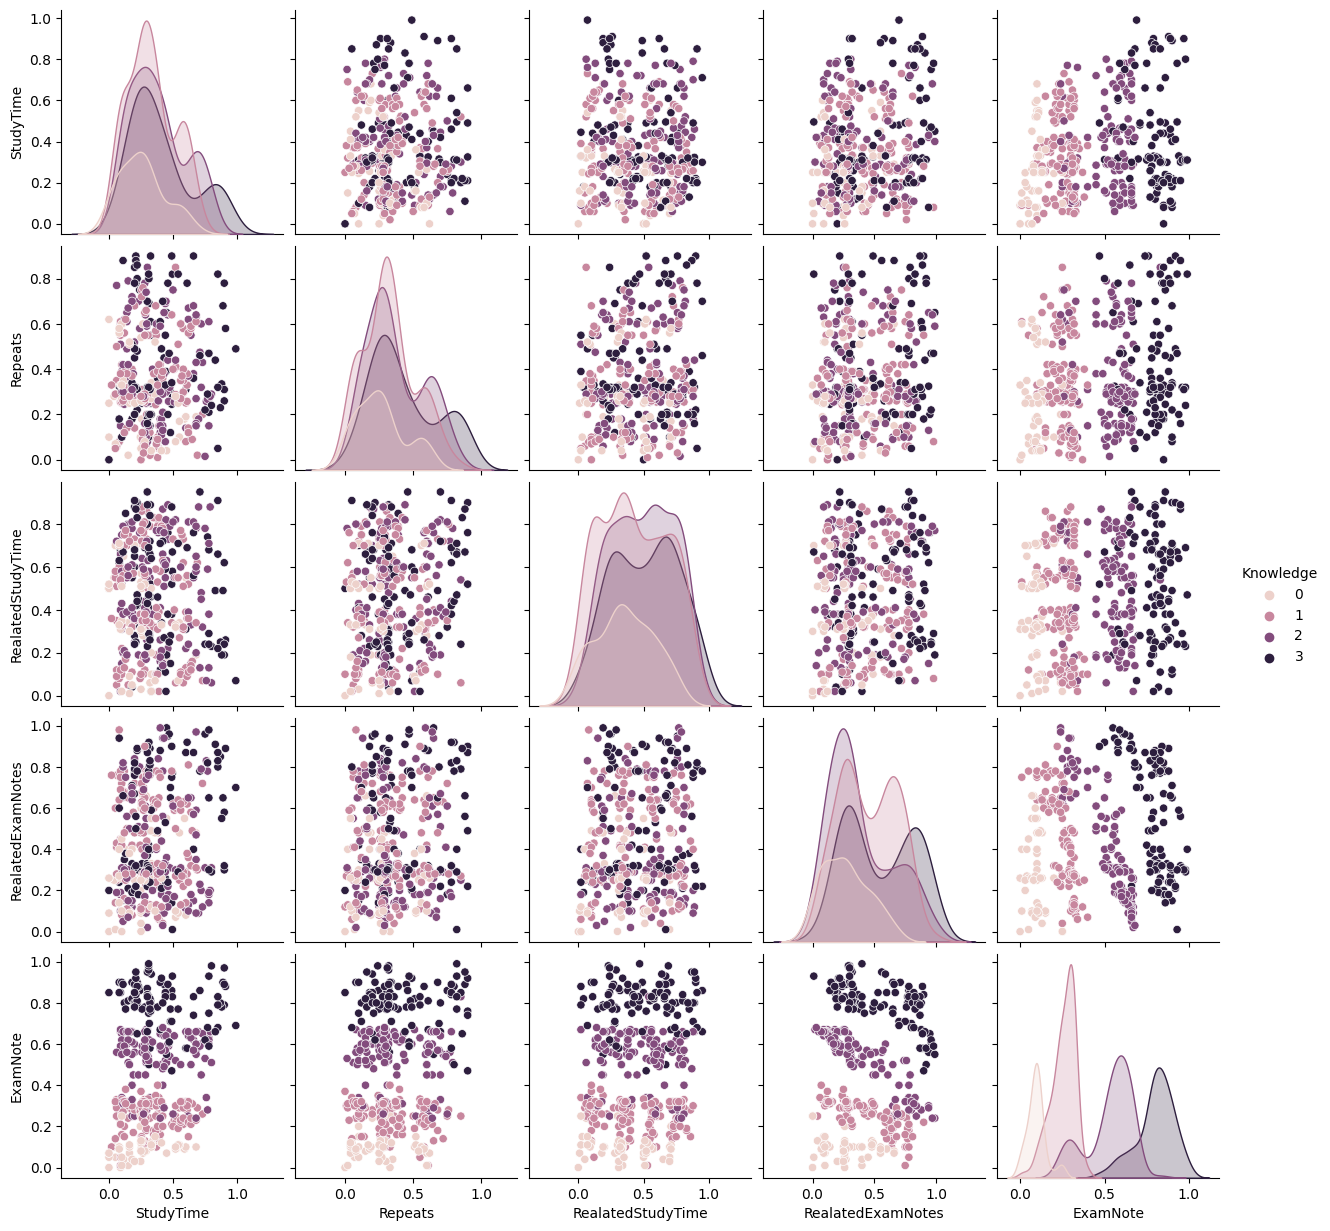

In [3]:
sns.pairplot(full_data , hue = 'Knowledge');

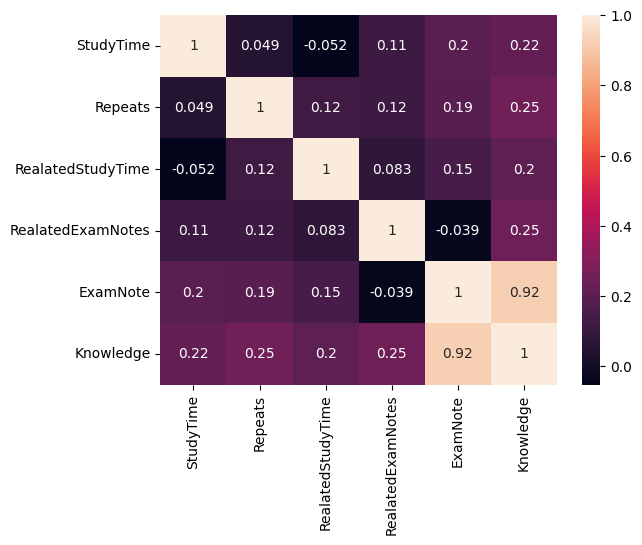

In [4]:
sns.heatmap(full_data.corr() , annot=True);

# Utils

In [5]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score , confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

class fonks:
    """
    Class'ın amacı:
    - Sıkça kullanılacak fonksiyonları oluşturmak ve kolayca çağırmak.
    - Daha düzenli ve değiştirilebilir bir programlama yapmak.
    """
    
    label = 'Knowledge'
    
    def trainTest(data , label=label , test_size = 0.2):
        """
        Alınan datayı istenen oranda Train & Test şeklinde bölüp X_train , X_test , y_train , y_test adındaki 4 değişken döndürür.

        Parameters
        ----------
        data : pandas.DataFrame
            Train & Test olarak bölünecek veri seti.
        label : str, optional
            Hedef değişkenin adı, by default 'Knowledge'.
        test_size : float, optional
            Test veri setinin boyutu, by default 0.2.

        Returns
        -------
        tuple
            X_train, X_test, y_train, y_test
        """

        X = data.drop(label ,axis = 1)
        y = data[label]
        X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53)
        
        return X_train, X_test, y_train,y_test
    
    def simple_scores(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Alınan acc, f1 ve precision skorlarını yazdırır.
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
            
        Returns
        -------
        print
            Train Acc , Train F1 , Train Precision , Test Acc , Test F1 , Test Precision
        """
        
        print(f'{name} Train Accuracy : {accuracy_score(y_train , y_train_pred)}')
        print(f'{name} Train Recall : {recall_score(y_train, y_train_pred, average="weighted")}')
        print(f'{name} Train Precision : {precision_score(y_train , y_train_pred, average="weighted")}')
        print(f'{name} Train F1 : {f1_score(y_train , y_train_pred , average="weighted")}')
        
        
        print("\n****************\n")
        
        print(f'{name} Test Accuracy : {accuracy_score(y_test , y_pred)}')
        print(f'{name} Test Recall : {recall_score(y_test, y_pred, average="weighted")}')
        print(f'{name} Test Precision : {precision_score(y_test , y_pred, average="weighted")}')
        print(f'{name} Test F1 : {f1_score(y_test , y_pred, average="weighted")}')
        
        
    
    def eval_metric(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Confusion_matrix ve Classification_report'u yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
            
        Returns
        -------
        print
            Train Confusion_matrix , Train Classification_report , Test Confusion_matrix , Test Classification_report
        """
    
        print(f"Test_Set {name}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print()
        print(f"Train_Set {name}")
        print(confusion_matrix(y_train, y_train_pred))
        print(classification_report(y_train, y_train_pred))
        
    

    def train_test_df(y_train, y_train_pred, y_test, y_pred, name='Model' , task='classification'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Accuracy, Recall, Precision,  yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional
            Datamızın task'i, by default 'classification'.
            
        Returns
        -------
        print
            Train Accuracy , Train Recall , Train Precision , Train F1 , Test Accuracy , Test Recall , Test Precision , Test F1
        """
        
        
        if task == 'classification':
            scores = {name+"_train": {"Accuracy" : accuracy_score(y_train, y_train_pred),
            "Recall" : recall_score(y_train, y_train_pred , average='weighted'),
            "Precision" : precision_score(y_train, y_train_pred , average='weighted'),
            "F1" : np.sqrt(f1_score(y_train, y_train_pred , average='weighted'))},
                    
            name+"_test": {"Accuracy" : accuracy_score(y_test, y_pred),
            "Recall" : recall_score(y_test, y_pred , average='weighted'),
            "Precision" : precision_score(y_test, y_pred , average='weighted'),
            "F1" : np.sqrt(f1_score(y_test, y_pred , average='weighted'))}}
            return pd.DataFrame(scores)
        
        
        
        if task == 'reg':
            
            scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),
            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                    
            name+"_test": {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
            return pd.DataFrame(scores)
        
        
    # def searchAlgorithms(base_model, params , X_train, y_train , complexity = 'normal' , searchType = 'grid' ):
    #     if searchType == 'grid':
    #         model_grid = GridSearchCV()

### Train | Test Split

In [6]:
X_train , X_test , y_train , y_test = fonks.trainTest(full_data , label='Knowledge' , test_size=0.2)

# Models

### Gaussian NB

In [7]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)

nb_train_pred = nb.predict(X_train)
nb_pred = nb.predict(X_test)

fonks.simple_scores(y_train, nb_train_pred , y_test , nb_pred)

Model Train Accuracy : 0.9099378881987578
Model Train Recall : 0.9099378881987578
Model Train Precision : 0.9147571406724088
Model Train F1 : 0.9099370200800466

****************

Model Test Accuracy : 0.8888888888888888
Model Test Recall : 0.8888888888888888
Model Test Precision : 0.9059454191033138
Model Test F1 : 0.8864197530864197


In [8]:
fonks.eval_metric(y_train, nb_train_pred , y_test , nb_pred , 'NB')

Test_Set NB
[[11  0  0  0]
 [ 0 21  0  0]
 [ 0  7 18  1]
 [ 0  0  1 22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.75      1.00      0.86        21
           2       0.95      0.69      0.80        26
           3       0.96      0.96      0.96        23

    accuracy                           0.89        81
   macro avg       0.91      0.91      0.90        81
weighted avg       0.91      0.89      0.89        81


Train_Set NB
[[ 35   4   0   0]
 [  2 105   1   0]
 [  0  15  80   1]
 [  0   0   6  73]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        39
           1       0.85      0.97      0.91       108
           2       0.92      0.83      0.87        96
           3       0.99      0.92      0.95        79

    accuracy                           0.91       322
   macro avg       0.92      0.91      0.91       322
weighted avg       0.

In [9]:
nb_df = fonks.train_test_df(y_train, nb_train_pred , y_test , nb_pred , 'NB')
nb_df

,NB_train,NB_test
Accuracy,0.909938,0.888889
Recall,0.909938,0.888889
Precision,0.914757,0.905945
F1,0.953906,0.941499


### Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_base = DecisionTreeClassifier()

params = {'max_depth' : np.arange(2,11) , 'min_samples_split' : np.arange(2,8) , 'max_features' : np.arange(2,6)}

dt_grid = GridSearchCV(dt_base , params , scoring='accuracy' , cv = 5) 
dt_grid.fit(X_train , y_train)

print(f'Best parameters: {dt_grid.best_params_}')
print(f'Best score: {dt_grid.best_score_:.2f}')

Best parameters: {'max_depth': 7, 'max_features': 5, 'min_samples_split': 3}
Best score: 0.93


In [11]:
dt = DecisionTreeClassifier(max_depth= 7 , max_features= 5 , min_samples_split= 2)
dt.fit(X_train, y_train)

dt_train_pred = dt.predict(X_train)
dt_pred = dt.predict(X_test)

fonks.simple_scores(y_train, dt_train_pred , y_test , dt_pred)

Model Train Accuracy : 0.9875776397515528
Model Train Recall : 0.9875776397515528
Model Train Precision : 0.9880212954747115
Model Train F1 : 0.987596461509505

****************

Model Test Accuracy : 0.9259259259259259
Model Test Recall : 0.9259259259259259
Model Test Precision : 0.9285650384684201
Model Test F1 : 0.9254269999611614


In [12]:
fonks.eval_metric(y_train, dt_train_pred , y_test , dt_pred , 'DT')

Test_Set DT
[[11  0  0  0]
 [ 1 20  0  0]
 [ 0  3 22  1]
 [ 0  0  1 22]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.87      0.95      0.91        21
           2       0.96      0.85      0.90        26
           3       0.96      0.96      0.96        23

    accuracy                           0.93        81
   macro avg       0.92      0.94      0.93        81
weighted avg       0.93      0.93      0.93        81


Train_Set DT
[[ 38   1   0   0]
 [  0 108   0   0]
 [  0   3  93   0]
 [  0   0   0  79]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.96      1.00      0.98       108
           2       1.00      0.97      0.98        96
           3       1.00      1.00      1.00        79

    accuracy                           0.99       322
   macro avg       0.99      0.99      0.99       322
weighted avg       0.

In [13]:
dt_df = fonks.train_test_df(y_train, dt_train_pred , y_test , dt_pred , 'DT')
all_df = pd.concat([nb_df , dt_df] , axis = 1)
all_df

,NB_train,NB_test,DT_train,DT_test
Accuracy,0.909938,0.888889,0.987578,0.925926
Recall,0.909938,0.888889,0.987578,0.925926
Precision,0.914757,0.905945,0.988021,0.928565
F1,0.953906,0.941499,0.993779,0.961991


### KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 5)

knn.fit(X_train , y_train)

knn_train_pred = knn.predict(X_train)
knn_pred = knn.predict(X_test)

fonks.simple_scores(y_train, knn_train_pred , y_test , knn_pred , 'KNN')

Model Train Accuracy : 0.8944099378881988
Model Train Recall : 0.8944099378881988
Model Train Precision : 0.9028788351991321
Model Train F1 : 0.8942778149454168

****************

Model Test Accuracy : 0.9506172839506173
Model Test Recall : 0.9506172839506173
Model Test Precision : 0.955761316872428
Model Test F1 : 0.9505554572761598


In [16]:
fonks.eval_metric(y_train, knn_train_pred , y_test , knn_pred , 'KNN')

Test_Set KNN
[[10  1  0  0]
 [ 0 21  0  0]
 [ 0  2 23  1]
 [ 0  0  0 23]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.88      1.00      0.93        21
           2       1.00      0.88      0.94        26
           3       0.96      1.00      0.98        23

    accuracy                           0.95        81
   macro avg       0.96      0.95      0.95        81
weighted avg       0.96      0.95      0.95        81


Train_Set KNN
[[ 29  10   0   0]
 [  3 104   1   0]
 [  0  15  80   1]
 [  0   0   4  75]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82        39
           1       0.81      0.96      0.88       108
           2       0.94      0.83      0.88        96
           3       0.99      0.95      0.97        79

    accuracy                           0.89       322
   macro avg       0.91      0.87      0.89       322
weighted avg       

In [18]:
knn_df = fonks.train_test_df(y_train, knn_train_pred , y_test , knn_pred , 'KNN')
all_df = pd.concat([all_df , knn_df] , axis = 1)
all_df

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test
Accuracy,0.909938,0.888889,0.987578,0.925926,0.894410,0.950617
Recall,0.909938,0.888889,0.987578,0.925926,0.894410,0.950617
Precision,0.914757,0.905945,0.988021,0.928565,0.902879,0.955761
F1,0.953906,0.941499,0.993779,0.961991,0.945663,0.974964


### LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

log_base = LogisticRegression(random_state= 53 , max_iter= 10000)

params = {'penalty' : ['l1' , 'l2'] , 'C' : [0.001 , 0.01 , 0.1 , 1 , 3, 5, 10 ,25, 50 , 100 , 200 , 300 , 500 ,750] ,
          'solver' : ['lbfgs' , 'liblinear']}

log_rand = RandomizedSearchCV(log_base , params , scoring='accuracy' , cv = 5 , n_iter=50)
log_rand.fit(X_train , y_train)

print(f'Best parameters: {log_rand.best_params_}')
print(f'Best score: {log_rand.best_score_:.2f}')

Best parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 200}
Best score: 0.97


c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Emincan\AppData\Local\Prog

In [21]:
log = LogisticRegression(solver = 'lbfgs' , penalty= 'l2' , C= 200) 
log.fit(X_train , y_train)

log_train_pred = log.predict(X_train)
log_pred = log.predict(X_test)

fonks.simple_scores(y_train, log_train_pred , y_test , log_pred , 'Log')

Log Train Accuracy : 0.9751552795031055
Log Train Recall : 0.9751552795031055
Log Train Precision : 0.9754278469381445
Log Train F1 : 0.975193139650272

****************

Log Test Accuracy : 0.9753086419753086
Log Test Recall : 0.9753086419753086
Log Test Precision : 0.9763842124953237
Log Test F1 : 0.9750897062327047


In [22]:
fonks.eval_metric(y_train, log_train_pred , y_test , log_pred , 'Log')

Test_Set Log
[[11  0  0  0]
 [ 0 21  0  0]
 [ 0  1 24  1]
 [ 0  0  0 23]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.95      1.00      0.98        21
           2       1.00      0.92      0.96        26
           3       0.96      1.00      0.98        23

    accuracy                           0.98        81
   macro avg       0.98      0.98      0.98        81
weighted avg       0.98      0.98      0.98        81


Train_Set Log
[[ 37   2   0   0]
 [  1 106   1   0]
 [  0   3  93   0]
 [  0   0   1  78]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.95      0.98      0.97       108
           2       0.98      0.97      0.97        96
           3       1.00      0.99      0.99        79

    accuracy                           0.98       322
   macro avg       0.98      0.97      0.97       322
weighted avg       

In [24]:
log_df = fonks.train_test_df(y_train, log_train_pred , y_test , log_pred , 'Log')
all_df = pd.concat([all_df, log_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test
Accuracy,0.909938,0.888889,0.987578,0.925926,0.894410,0.950617,0.975155,0.975309
Recall,0.909938,0.888889,0.987578,0.925926,0.894410,0.950617,0.975155,0.975309
Precision,0.914757,0.905945,0.988021,0.928565,0.902879,0.955761,0.975428,0.976384
F1,0.953906,0.941499,0.993779,0.961991,0.945663,0.974964,0.987519,0.987466


### SVC

In [26]:
from sklearn.svm import SVC

svc_base = SVC(random_state= 53)

params = {'kernel' : ['linear' , 'poly' , 'rbf' , 'sigmoid'] , 'degree' : [2,3,4,5] , 'gamma' : ['scale' , 'auto'] , 'C' : np.arange(0.01,100,1) }

svc_grid = GridSearchCV(svc_base , params , scoring='accuracy' , cv = 5 )
svc_grid.fit(X_train,y_train)

print(f'Best parameters: {svc_grid.best_params_}')
print(f'Best score: {svc_grid.best_score_:.2f}')

Best parameters: {'C': 74.01, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best score: 0.97


In [27]:
svc = SVC(random_state=53 , C=74 , degree=2 , gamma = 'auto' , kernel = 'rbf')
svc.fit(X_train,y_train)

svc_train_pred = svc.predict(X_train)
svc_pred = svc.predict(X_test)

fonks.simple_scores(y_train, svc_train_pred , y_test , svc_pred , 'SVC')

SVC Train Accuracy : 0.9751552795031055
SVC Train Recall : 0.9751552795031055
SVC Train Precision : 0.9763435052660004
SVC Train F1 : 0.9752066309961753

****************

SVC Test Accuracy : 0.9753086419753086
SVC Test Recall : 0.9753086419753086
SVC Test Precision : 0.9763842124953237
SVC Test F1 : 0.9750897062327047


In [28]:
fonks.eval_metric(y_train, svc_train_pred , y_test , svc_pred , 'SVC')

Test_Set SVC
[[11  0  0  0]
 [ 0 21  0  0]
 [ 0  1 24  1]
 [ 0  0  0 23]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.95      1.00      0.98        21
           2       1.00      0.92      0.96        26
           3       0.96      1.00      0.98        23

    accuracy                           0.98        81
   macro avg       0.98      0.98      0.98        81
weighted avg       0.98      0.98      0.98        81


Train_Set SVC
[[ 37   2   0   0]
 [  0 108   0   0]
 [  0   5  91   0]
 [  0   0   1  78]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        39
           1       0.94      1.00      0.97       108
           2       0.99      0.95      0.97        96
           3       1.00      0.99      0.99        79

    accuracy                           0.98       322
   macro avg       0.98      0.97      0.98       322
weighted avg       

In [30]:
svc_df = fonks.train_test_df(y_train, svc_train_pred , y_test , svc_pred , 'SVC')
all_df = pd.concat([all_df , svc_df] , axis= 1)
all_df

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test
Accuracy,0.909938,0.888889,0.987578,0.925926,0.894410,0.950617,0.975155,0.975309,0.975155,0.975309
Recall,0.909938,0.888889,0.987578,0.925926,0.894410,0.950617,0.975155,0.975309,0.975155,0.975309
Precision,0.914757,0.905945,0.988021,0.928565,0.902879,0.955761,0.975428,0.976384,0.976344,0.976384
F1,0.953906,0.941499,0.993779,0.961991,0.945663,0.974964,0.987519,0.987466,0.987526,0.987466


In [ ]:
# Best model is LogisticRegression and SVC.
# LogisticRegression because its less complex than SVC.
# If you want to use that model you can create LogisticRegression with Best parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 200} these parameters.
# Then you can train your model with your full data. I dont need for it now, so its done.

In [ ]:
# Done